# INTRODUCTION

The purpose of this project is to make accurate salary preditctions that are based on known salaries so the company is able to 

recruit and retain top talent. This model will serve as a guide for offering competetive compensation to existing and future 

employees while controlling payroll expenses.

Data transformation and machine learning will be used to create a model that will predict a salary when given years of 

experience, job type, college degree, college major, industry, and miles from a metropolis.

# DATA

The data for this model is fairly simplified . The raw data consists of a training dataset with the features listed above and 

their corresponding salaries. Twenty percent of this training dataset was split into a test dataset with corresponding salaries 

so accuracy and error of the model can be determined.

There is also a testing dataset that does not have any salary information available and was used as a substitute for real-world 

data.


Information Used To Predict Salaries Explained:


 	Years Experience: How many years of experience

 	Job Type: The position held (Prof,Asst Prof,Associate Prof)

 	College Degree: Doctoral

 	Year of Services

 	Year since in Phd 

 	Discipline

  

 

Concept Used : Supervised Machine Learning
Algorithm : Linear Regression

# IMPORTING THE LIBRARIES


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# LOADING DATASET (CSV FILE)

In [70]:
df = pd.read_csv('Salary_project.csv')
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [71]:
#Expoloring the last 10 datasets
df.tail(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
387,Prof,A,29,15,Male,109305
388,Prof,A,38,36,Male,119450
389,Prof,A,33,18,Male,186023
390,Prof,A,40,19,Male,166605
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


# ENCODING THE RANK ,DISCIPLINE AND SEX THROUGH LABEL ENCODER

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
lencode=LabelEncoder()
df['sex']=lencode.fit_transform(df['sex'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,1,139750
1,Prof,B,20,16,1,173200
2,AsstProf,B,4,3,1,79750
3,Prof,B,45,39,1,115000
4,Prof,B,40,41,1,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,1,103106
393,Prof,A,31,19,1,150564
394,Prof,A,42,25,1,101738
395,Prof,A,25,15,1,95329


In [74]:
lencode=LabelEncoder()
df['rank']=lencode.fit_transform(df['rank'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,1,139750
1,2,B,20,16,1,173200
2,1,B,4,3,1,79750
3,2,B,45,39,1,115000
4,2,B,40,41,1,141500
...,...,...,...,...,...,...
392,2,A,33,30,1,103106
393,2,A,31,19,1,150564
394,2,A,42,25,1,101738
395,2,A,25,15,1,95329


In [75]:
lencode=LabelEncoder()
df['discipline']=lencode.fit_transform(df['discipline'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [76]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# CHECKING THE DATATYPES AFTER ENCODING

In [77]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

In [78]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [79]:
# Statistical summary of the dataset
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [80]:
df.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       52
sex                2
salary           371
dtype: int64

In [81]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [82]:
#shape of the dataset
df.shape

(397, 6)

In [83]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


In [84]:
#checking the null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There is no null values in this dataset

In [85]:

list(df.columns.values.tolist())

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [86]:
from scipy import stats

In [87]:
print(df.dtypes)

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object


All data types seem appropriate for their labels. 

In [88]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [89]:
x=df.iloc[:,:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [90]:
y=df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [91]:
# Bifurcating the dataset into features and labels
x = df.iloc[:,0].values
y = df.iloc[:,-1].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

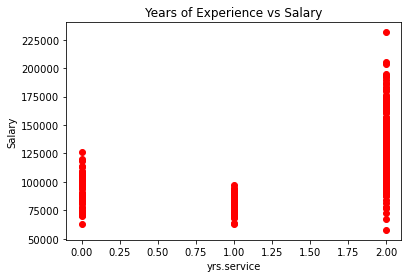

In [92]:
# Scatter Plot
plt.scatter(x,y,marker='o',color='red')
plt.title("Years of Experience vs Salary")
plt.xlabel("yrs.service")
plt.ylabel("Salary")
plt.show()

# CREATING TRAIN AND TEST SETS

In [93]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [94]:
from sklearn.linear_model import LinearRegression
# Instantiating the LinearRegression object
reg = LinearRegression()
print('success')

success


In [95]:
# Training the model
reg.fit(X_train,Y_train)

LinearRegression()

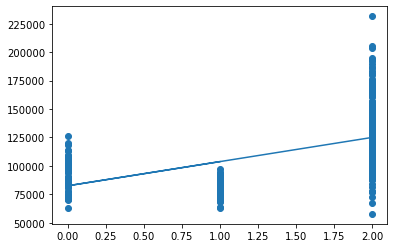

In [96]:
# Plotting the regression line
line = reg.coef_*x + reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [97]:
# Predicting the output
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Predicted':np.around(y_pred.flatten(),decimals=0),'Actual':Y_test.flatten()})

     Predicted  Actual
0      82518.0  105000
1     103766.0   78785
2     125015.0  109000
3     103766.0   78500
4     125015.0  155865
..         ...     ...
115    82518.0   86895
116    82518.0  100938
117   125015.0  151575
118   125015.0  194800
119   125015.0  101100

[120 rows x 2 columns]


<AxesSubplot:>

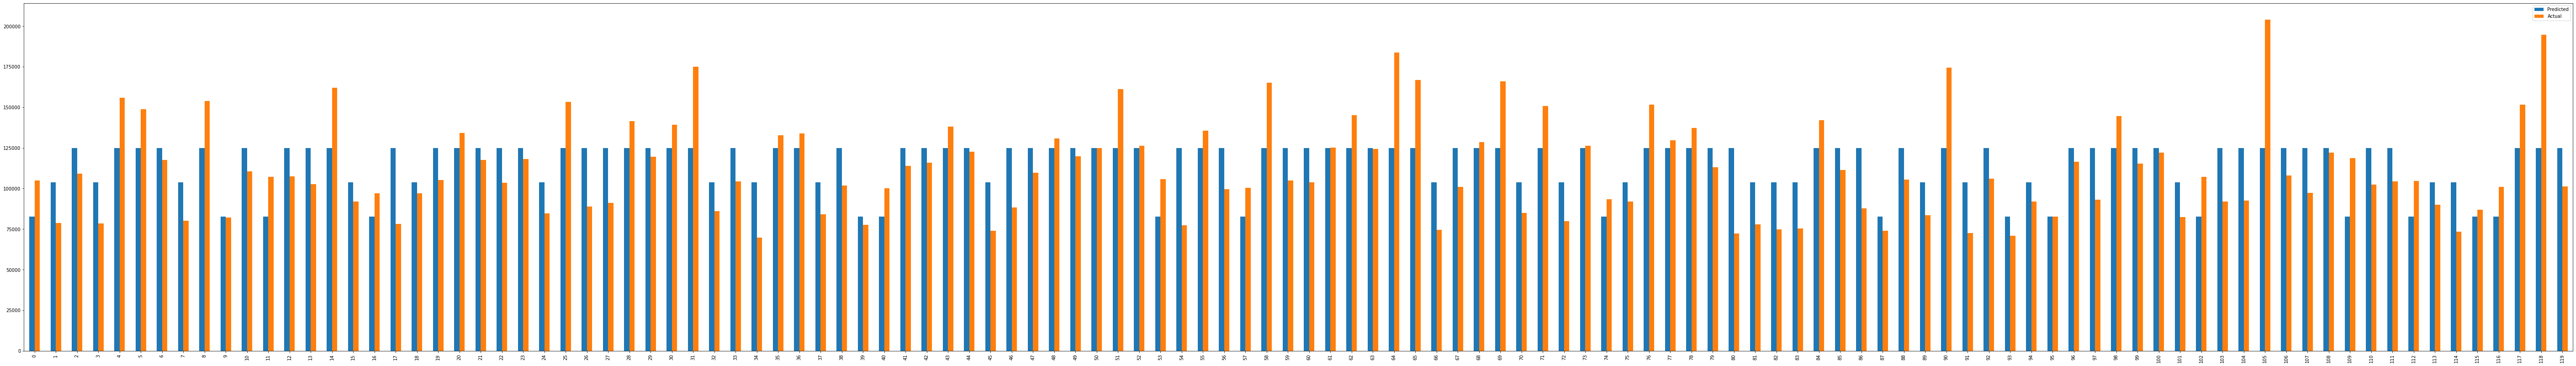

In [98]:
print(df)
df.plot(kind='bar',figsize=(100,14))

In [99]:
sal = reg.predict([[5]])
print("If a person has 5 years of experience then his salary would be approximate {}".format(sal[0]))

If a person has 5 years of experience then his salary would be approximate [188760.82142857]


In [100]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",round(metrics.mean_absolute_error(Y_test,y_pred),2))
print("R-squared  : ",r2_score(Y_test,y_pred))
print("Accuracy of the model : {} % ".format(round(reg.score(X_test,Y_test)*100,2)))

Mean Absolute Error :  21148.17
R-squared  :  0.23923815421341466
Accuracy of the model : 23.92 % 


In [101]:
df.corr()

,Predicted,Actual
Predicted,1.00000,0.49989
Actual,0.49989,1.00000
